In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data.describe(include='object')

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


### Determing the varaibles of interest

In [6]:
data = data.drop(['Model'],axis = 1)

In [7]:
data.isna().mean() * 100

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [8]:
data = data.dropna(axis=0)

In [9]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


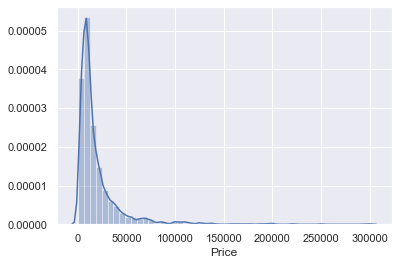

In [10]:
sns.distplot(data['Price'])

## Dealing with outlier

In [11]:
## One way of dealing with outliers is removing the top one percentile from the data

In [12]:
q = data['Price'].quantile(0.99)

In [13]:
data = data[data['Price'] < q]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


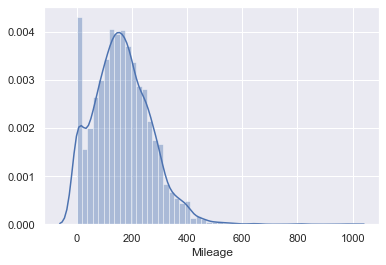

In [14]:
sns.distplot(data['Mileage'])

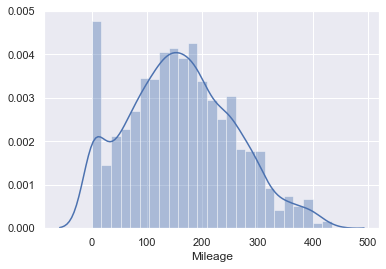

In [15]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage'] < q]
sns.distplot(data['Mileage'])

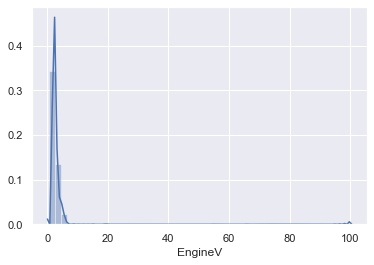

In [16]:
sns.distplot(data['EngineV'])

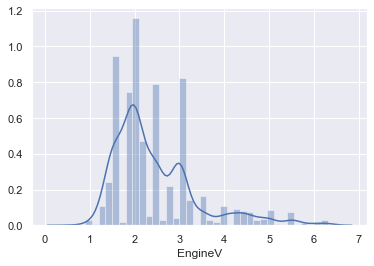

In [17]:
data = data[data['EngineV'] < 6.5]
sns.distplot(data['EngineV'])

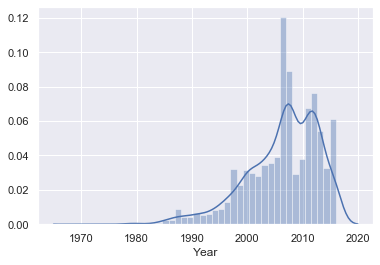

In [18]:
sns.distplot(data['Year'])

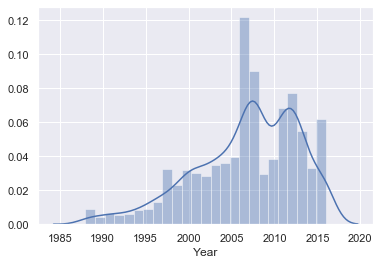

In [19]:
q = data['Year'].quantile(0.01)
data = data[data['Year'] > q]
sns.distplot(data['Year'])

In [20]:
data = data.reset_index(drop=True)

In [21]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS asuumptions

In [22]:
## 1. Linearity

Text(0.5, 1.0, 'Price and Mileage')

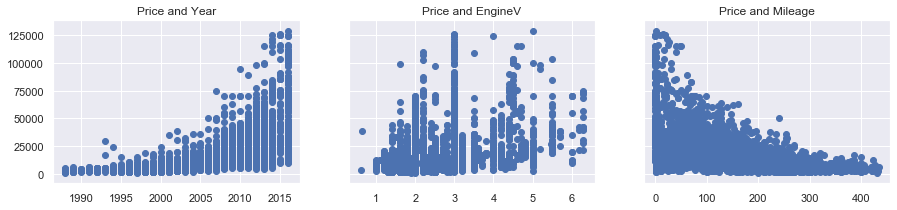

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data['Year'],data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'],data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data['Mileage'],data['Price'])
ax3.set_title('Price and Mileage')

In [24]:
### There is a pattern in the data but not a linear one

In [25]:
### So we should do some transformation before 

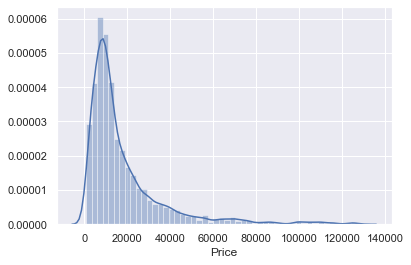

In [26]:
sns.distplot(data['Price'])

In [27]:
###Price is not normally distributed so it relationship with other normally distributed features are not linear

In [28]:
log_price = np.log(data['Price'])
data['Price'] = log_price

Text(0.5, 1.0, 'Price and Mileage')

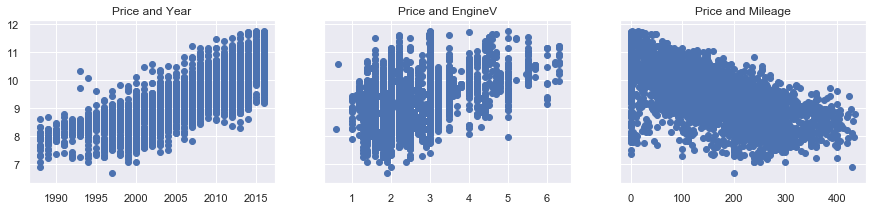

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data['Year'],data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'],data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data['Mileage'],data['Price'])
ax3.set_title('Price and Mileage')

In [30]:
## 2. No Endogeneity

In [31]:
## 3. Normality & Homoscedasticy

In [32]:
##### Normality is assumped for large smaples.

In [33]:
#### Zero mean: Is acommplished by including the intercept in the regression

In [34]:
#### Homoscedasticy: Holds as we can from the graphs

In [35]:
## 4. No Autocorrelation : Observations are not dependent on each other since each observation comes from a different 
                            ##customer 

In [36]:
## 5. Multicollinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [38]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [39]:
## VIF > 10 is unacceptable

In [40]:
data = data.drop(['Year'], axis = 1)

### Create dummy Variables

In [41]:
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [42]:
data_with_dummies

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [43]:
### Rearange a bit

In [44]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [45]:
cols = ['Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes' ]

In [46]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear regression model

#### Declare the input and the target

In [47]:
targets = data_preprocessed['Price']

In [48]:
inputs = data_preprocessed.drop(['Price'], axis =1)

### Scale the data

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
inputs_scaled = scaler.transform(inputs)

### Trian Test Split

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size = 0.2, random_state=365)

### Create the regression

In [52]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checks

In [53]:
### check final results by plotting the predicted values of the regression against the  against obseved values.
### The observed values are the targets

In [54]:
y_hat = reg.predict(x_train)

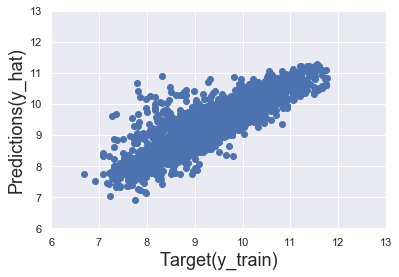

In [55]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target(y_train)',size=18)
plt.ylabel('Predictions(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [56]:
### Whwn the target is 7, we want the prediction to be also 7 

In [57]:
### Residual Plot
### it is the defference between targets and the predictions

Text(0.5, 1.0, 'Residuals PDF')

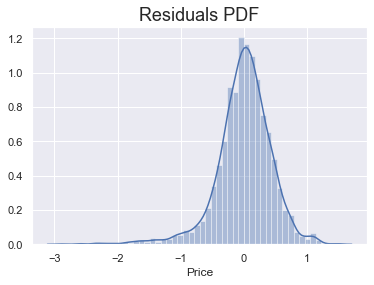

In [58]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)

In [59]:
### Normility & Homoscesdasticity
#*** Errors must be distributed with a mean of zero
##it is observed that the mean in the graph above is zero is it is normally distributed
## if certian observarions for which (ya-train - y-hat) is much lower that the mean (negative skewness)
   ##(a much higher price predicted than is observed)
## if there are no skewness on the right we can conclude that the predictions rarely underestimate the targets
## its serves as a guide to better train our model

In [60]:
reg.score(x_train,y_train)

0.744996578792662

### Finding the weight and bais

In [61]:
## bais 

reg.intercept_

9.415239458021299

In [62]:
# weight

reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [63]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


### Testing

In [64]:
y_hat_test = reg.predict(x_test)

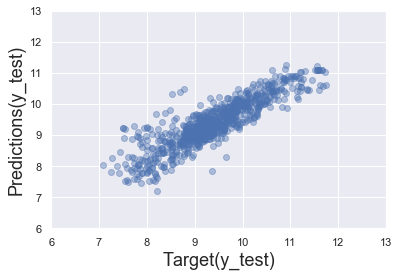

In [67]:
plt.scatter(y_test, y_hat_test, alpha=0.4)
plt.xlabel('Target(y_test)',size=18)
plt.ylabel('Predictions(y_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()